### Student Information
Name: 陳彥安

Student ID: 107062624

GitHub ID: yanang

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

## Part 1: Take home exercises

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
# Answer
X[X['category_name']=='sci.med'].iloc[::10][0:5]

#X .loc[lambda f: f.category_name == 'sci.med'].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

### Answer here
A B E(0 1 4) 這欄所儲存的都是值裡面的 None
而 C D F 所儲存的為字串內容

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [4]:
Y = X
X_sample = X.sample(n=500)

In [5]:
# Answer here
# X dataframe 沒有任何改變
Y.equals(X)

True

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

### Answer
I plot the first graph and find there is another shorter way to draw the picture.
So, I have two version to answer.

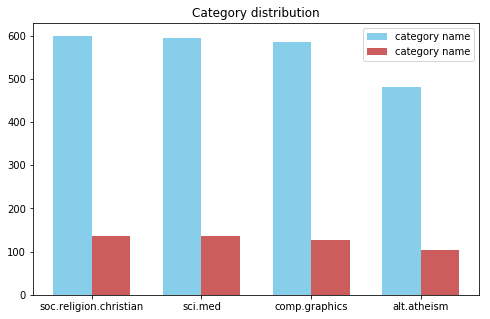

In [6]:
# Answer here
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind = np.arange(len(X.category_name.value_counts()))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (8,5))
rects1 = ax.bar(ind - width/2, X.category_name.value_counts(), width,
                color='SkyBlue', label='category name')
rects2 = ax.bar(ind + width/2, X_sample.category_name.value_counts(), width,
                color='IndianRed', label='category name')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Category distribution')
ax.set_xticks(ind)
ax.set_xticklabels(('soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'))
ax.legend()

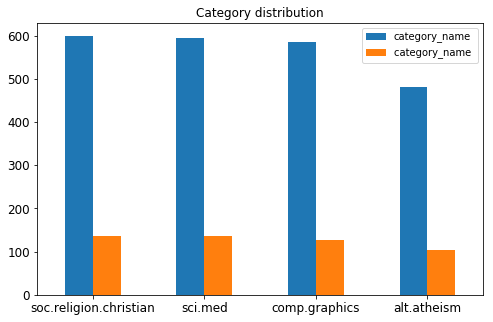

In [7]:
# Answer here
df = X.category_name.value_counts().rename('category_name').to_frame()\
               .join(X_sample.category_name.value_counts().rename('category_name ').to_frame())
df.plot(kind = 'bar', title = 'Category distribution', rot = 0, fontsize = 12, figsize = (8,5))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [9]:
# Answer here
count_vect.get_feature_names()[np.where(X_counts[4:5,0:100].toarray() == 1)[1][1]]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

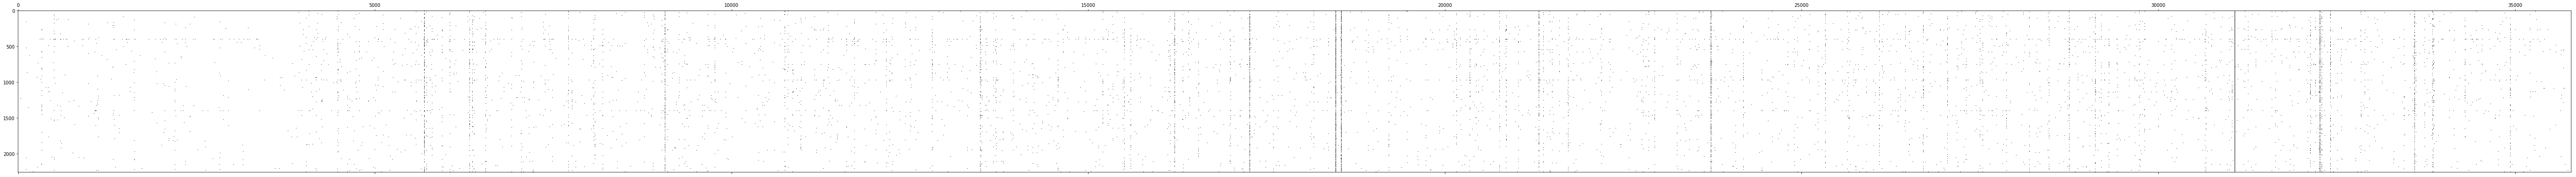

In [10]:
# Answer here 
# use plt.spy to plot the sparse matrix

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:]]
plot_z = X_counts[0:, 0:].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(100, 100))
plt.spy(df_todraw)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

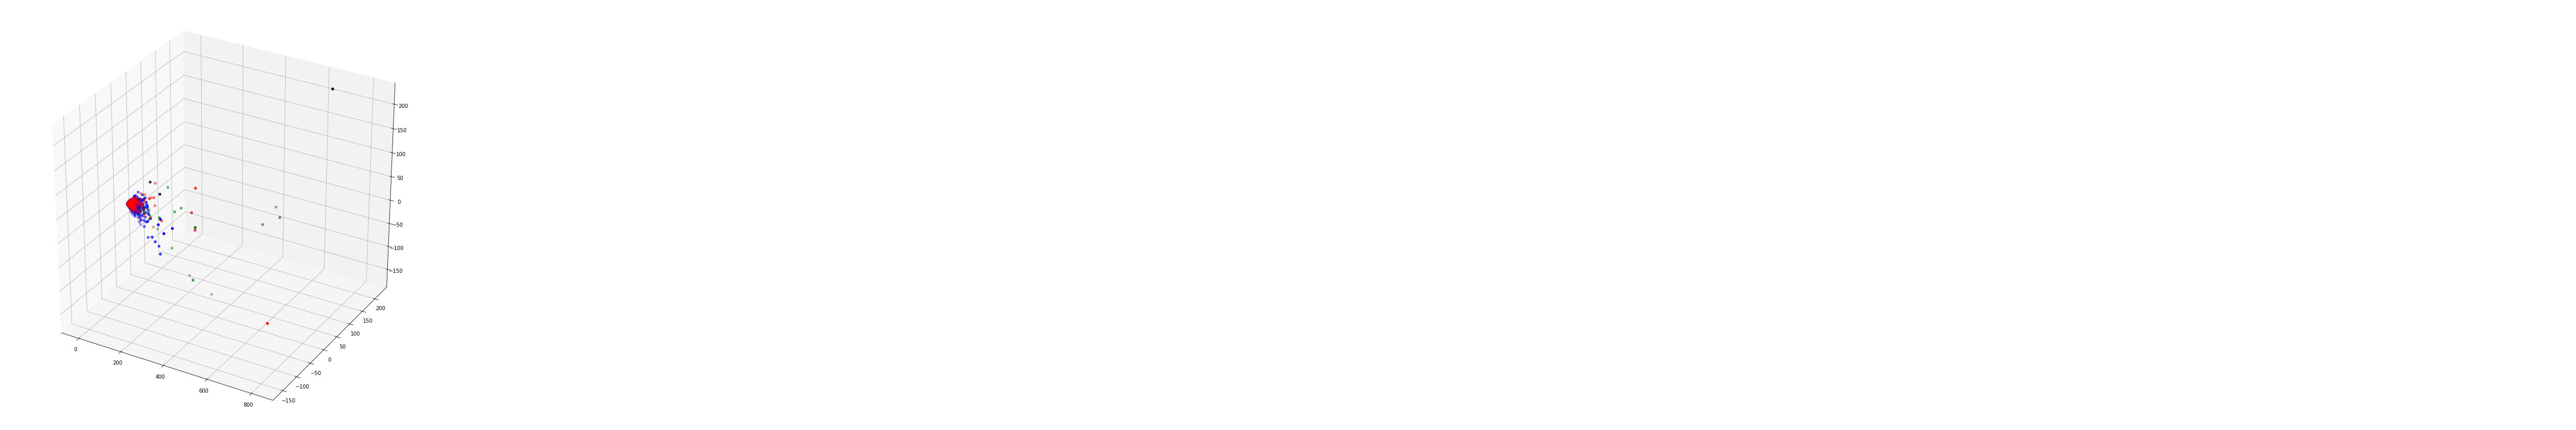

In [11]:
# Answer here
col = ['red', 'blue', 'black', 'green']
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure(figsize=(15, 15))
plt3 = fig.add_subplot(1,1,1, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
    plt3.scatter(xs, ys, zs, c = c, marker='o')

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [12]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [13]:
# Answer here
import plotly
import plotly.plotly as py
import helpers.text_analysis as ta
plotly.tools.set_credentials_file(username='Yan-ang', api_key='3olIkg0ORZs7EPlzd3jC')

py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


/anaconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [14]:
# Answer 
# only focus on the data within mean frequencies to mean + 2 * standard deviation
term_freq_mean = []
feature_names_mean = []
tmp_mean = term_frequencies.mean()
tmp_std = np.std(term_frequencies)
tmp_name = count_vect.get_feature_names()
for i in range(len(term_frequencies)):
    if (term_frequencies[i] >tmp_mean) and (term_frequencies[i]<(tmp_mean + 2 *tmp_std)):
        term_freq_mean.append(term_frequencies[i])
        feature_names_mean.append(tmp_name[i])
    
py.iplot(ta.plot_word_frequency([ feature_names_mean,term_freq_mean], "Term Frequency Distribution"))

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below


In [15]:
# Answer here
feature_names_mean,term_freq_mean

mix = [(feature_names_mean[i], term_freq_mean[i]) for i in range(len(term_freq_mean))]
sorted_names = [ feature_names_mean for f, name in sorted(mix, reverse=True)]
sorted_feq = sorted(term_freq_mean, reverse=True)

py.iplot(ta.plot_word_frequency([sorted_names[0], sorted_feq], "Term Frequency Distribution(Long tail)"))

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [16]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

In [17]:
# Answer here
# Yes it works(bin_category_name is equal to bin_category)
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


## Part 2: New dataset (lab 1 operations)

In [18]:
# define the format_rows function based on the heplers
def formats_rows1(docs):
    """ format the 'text' field and strip special characters """
    D = []
    for d in docs:
        temp_d = (" ".join(d.split("\t")).strip('\n\t')).rstrip('01').rstrip()
        D.append([temp_d])
    return D

def formats_rows2(docs):
    """ format the 'score' field and strip special characters """
    D = []
    for d in docs:
        temp_d = (" ".join(d.split("\t")).strip('\n\t'))
        D.append([temp_d[len(temp_d)-1]])
    return D

#read data
amazon_data = open("sentiment labelled sentences/amazon_cells_labelled.txt")
amazon_X = pd.DataFrame.from_records(formats_rows1(amazon_data), columns= ['text'])
amazon_data = open("sentiment labelled sentences/amazon_cells_labelled.txt")
amazon_X['score'] = pd.DataFrame.from_records(formats_rows2(amazon_data))

imdb_data = open("sentiment labelled sentences/imdb_labelled.txt")
imdb_X = pd.DataFrame.from_records(formats_rows1(imdb_data), columns= ['text'])
imdb_data = open("sentiment labelled sentences/imdb_labelled.txt")
imdb_X['score'] = pd.DataFrame.from_records(formats_rows2(imdb_data))

yelp_data = open("sentiment labelled sentences/yelp_labelled.txt")
yelp_X = pd.DataFrame.from_records(formats_rows1(yelp_data), columns= ['text'])
yelp_data = open("sentiment labelled sentences/yelp_labelled.txt")
yelp_X['score'] = pd.DataFrame.from_records(formats_rows2(yelp_data))

In [19]:
# show the data
print(amazon_X[0:10])
print(imdb_X[0:10])
print(yelp_X[0:10])

                                                text score
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1
2                             Great for the jawbone.     1
3  Tied to charger for conversations lasting more...     0
4                                  The mic is great.     1
5  I have to jiggle the plug to get it to line up...     0
6  If you have several dozen or several hundred c...     0
7        If you are Razr owner...you must have this!     1
8                Needless to say, I wasted my money.     0
9                   What a waste of money and time!.     0
                                                text score
0  A very, very, very slow-moving, aimless movie ...     0
1  Not sure who was more lost - the flat characte...     0
2  Attempting artiness with black & white and cle...     0
3         Very little music or anything to speak of.     0
4  The best scene in the movie was when Gerardo i...    

In [20]:
# join three data set into one
frames = [amazon_X, imdb_X, yelp_X]
X = pd.concat(frames)
print(len(X))
X[0:10]

3000


,text,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [21]:
X.iloc[::10, :][0:10]

,text,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [22]:
#check the missing data
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

X.isnull().apply(lambda x: check_missing_values(x))

text     (The amoung of missing records is: , 0)
score    (The amoung of missing records is: , 0)
dtype: object

In [23]:
# check the duplicated data and delete them
sum(X.duplicated())

18

In [24]:
sum(X.duplicated('text'))

18

In [25]:
X.drop_duplicates(keep=False, inplace=True)

In [26]:
sum(X.duplicated('text'))

0

In [27]:
# get the smaple data from X(all data)
X_sample = X.sample(n=500)

In [28]:
X_sample[0:5]

,text,score
143,And the red curry had so much bamboo shoots an...,0
376,Protects the phone on all sides.,1
171,This movie now joins Revenge of the Boogeyman ...,0
22,How can anyone in their right mind ask for any...,1
655,Also great directing and photography.,1


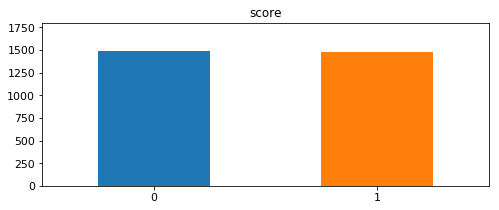

In [29]:
# plot the barchart for X and X_sample
X.score.value_counts().plot(kind = 'bar',
                                    title = 'score',
                                    ylim = [0, 1800],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

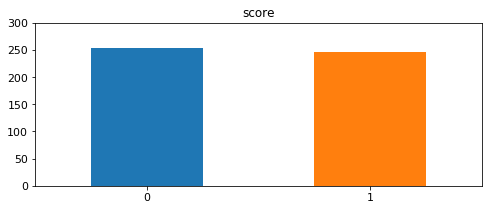

In [30]:
X_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'score',
                                    ylim = [0, 300],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

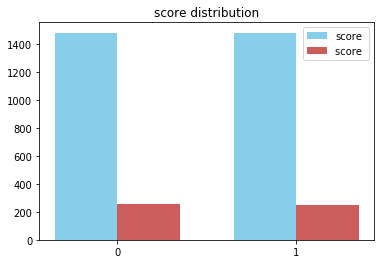

In [31]:
ind = np.arange(len(X.score.value_counts()))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, X.score.value_counts(), width,
                color='SkyBlue', label='score')
rects2 = ax.bar(ind + width/2, X_sample.score.value_counts(), width,
                color='IndianRed', label='score ')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('score distribution')
ax.set_xticks(ind)
ax.set_xticklabels(('0', '1'))
ax.legend()

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/yanang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# create features into 'unigrams'
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))

In [34]:
X[0:5]

,text,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [35]:
# Feature subset selection
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [36]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [37]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

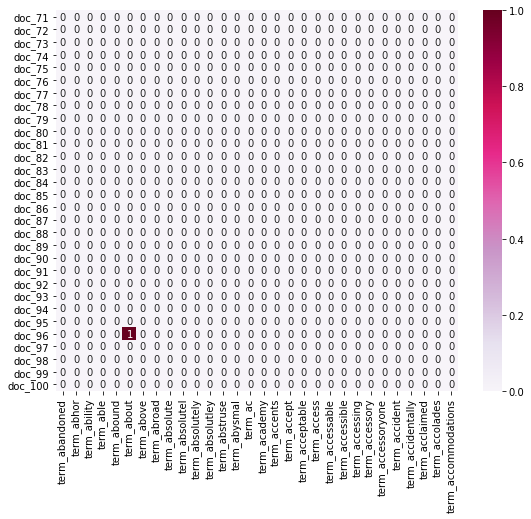

In [38]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[70:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[70:100]]
plot_z = X_counts[70:100, 70:100].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

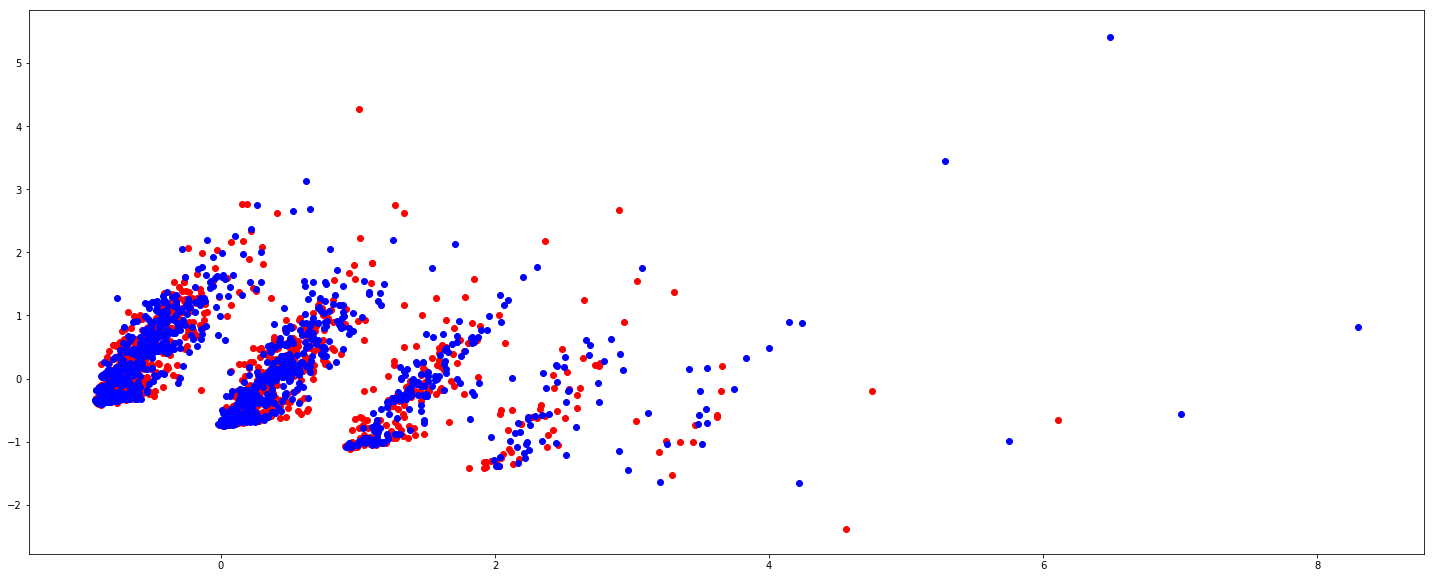

In [39]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
categories = ['0','1']
col = ['red', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['score'] == category].T[0]
    ys = X_reduced[X['score'] == category].T[1] 
    ax.scatter(xs, ys, c = c, marker='o')

plt.show()

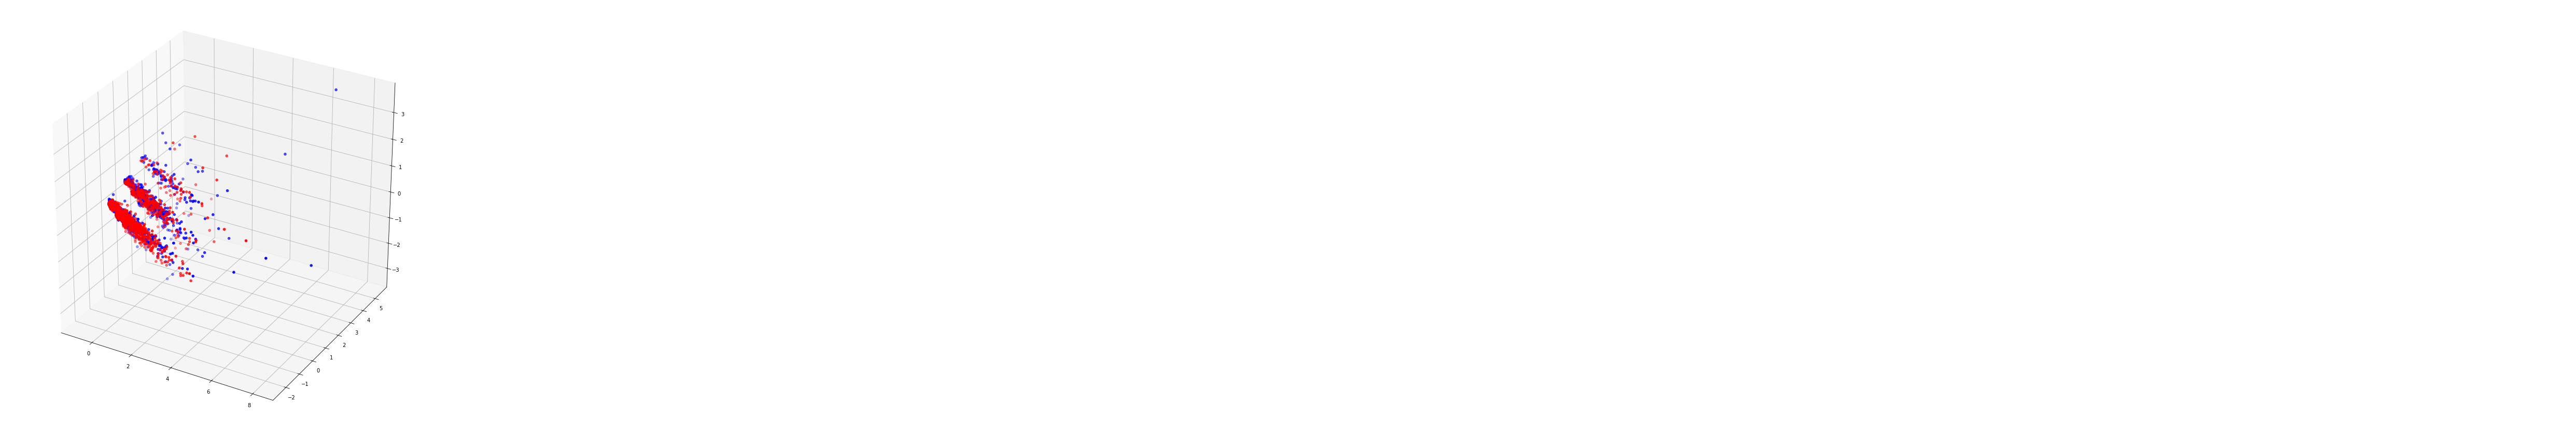

In [40]:
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure(figsize=(15, 15))
plt3 = fig.add_subplot(1,1,1, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['score'] == category].T[0]
    ys = X_reduced3[X['score'] == category].T[1]
    zs = X_reduced3[X['score'] == category].T[2]
    plt3.scatter(xs, ys, zs, c = c, marker='o')

plt.show()

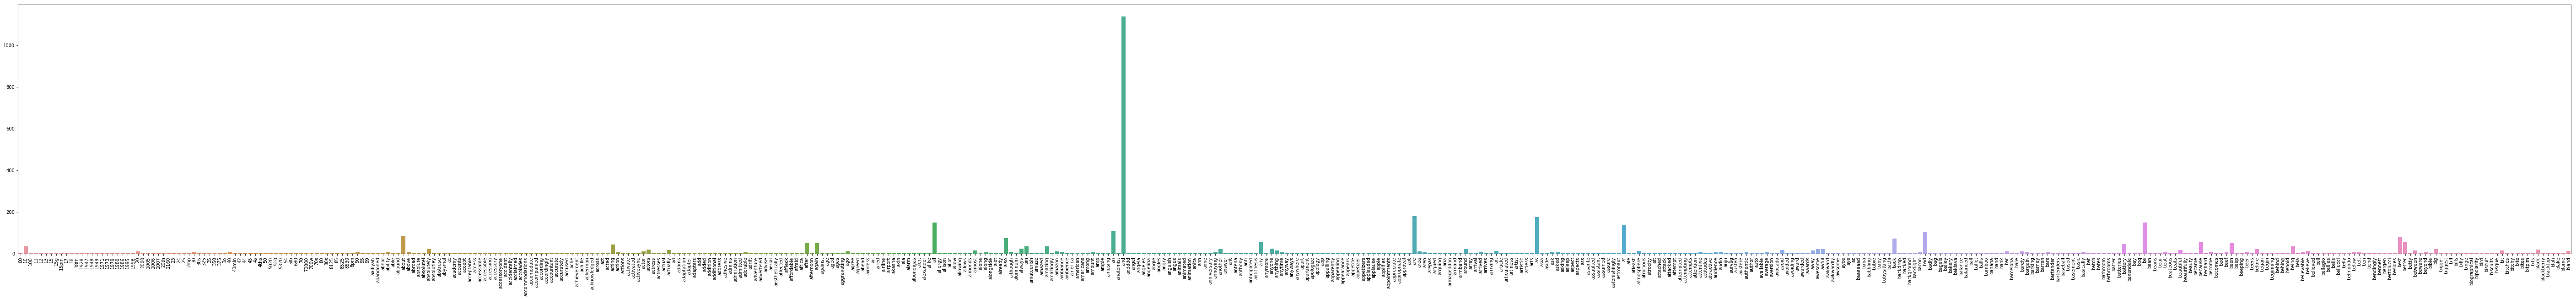

In [41]:
# caculate frequencies
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:500], 
            y=term_frequencies[:500])
g.set_xticklabels(count_vect.get_feature_names()[:500], rotation = 90);

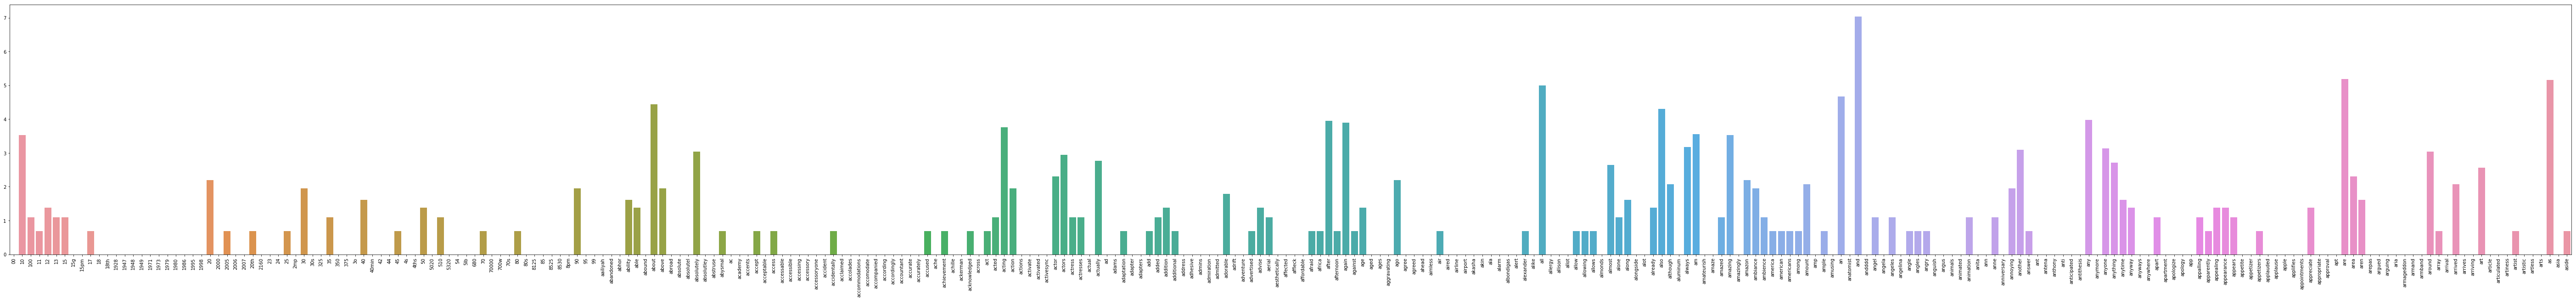

In [42]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [43]:
plotly.tools.set_credentials_file(username='Yan-ang', api_key='3olIkg0ORZs7EPlzd3jC')

py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [44]:
term_freq_mean = []
feature_names_mean = []
tmp_mean = term_frequencies.mean()
tmp_std = np.std(term_frequencies)
tmp_name = count_vect.get_feature_names()

# only draw the data within mean frequencies to mean + 2 * standard deviation
for i in range(len(term_frequencies)):
    if (term_frequencies[i] >tmp_mean) and (term_frequencies[i]<(tmp_mean + 2 *tmp_std)):
        term_freq_mean.append(term_frequencies[i])
        feature_names_mean.append(tmp_name[i])
    
py.iplot(ta.plot_word_frequency([feature_names_mean,term_freq_mean], "Term Frequency Distribution"))

In [45]:
feature_names_mean,term_freq_mean

mix = [(feature_names_mean[i], term_freq_mean[i]) for i in range(len(term_freq_mean))]
sorted_names = [ feature_names_mean for f, name in sorted(mix, reverse=True)]
sorted_feq = sorted(term_freq_mean, reverse=True)

py.iplot(ta.plot_word_frequency([sorted_names[0], sorted_feq], "Term Frequency Distribution(Long tail)"))

In [46]:
# Binarization for score
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)
X['bin_score'] = mlb.transform(X['score']).tolist()
X[0:9]

,text,score,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


## Part 3: New dataset & my Operations

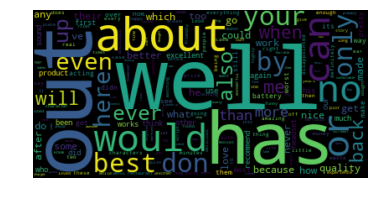

In [47]:
# bulid new data visualizations
# also use the data within mean frequencies to mean + 2 * standard deviation
df_dict = {"feature_names": feature_names_mean,"frequencies": term_freq_mean}
df = pd.DataFrame(df_dict)

temp_df = {}
for i, j in df.values:
    temp_df[i] = j

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=temp_df)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
# build TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
X_feature = vect.fit_transform(X.text)
vect.get_feature_names()[70:90]

['abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access']

In [49]:
X_feature[0:5,0:50].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

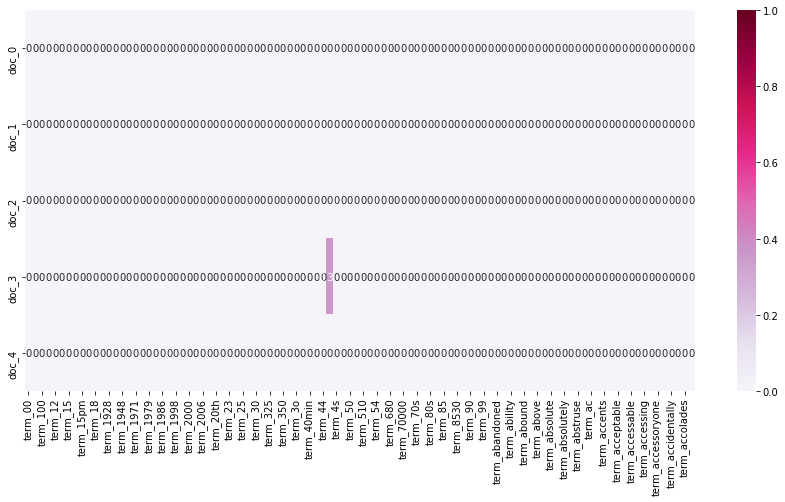

In [50]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in vect.get_feature_names()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:5]]
plot_z = X_feature[0:5, 0:100].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [51]:
frequencies = []
for j in range(0,X_feature.shape[1]):
    frequencies.append(sum(X_feature[:,j].toarray()))
frequencies = np.asarray(X_feature.sum(axis=0))[0]

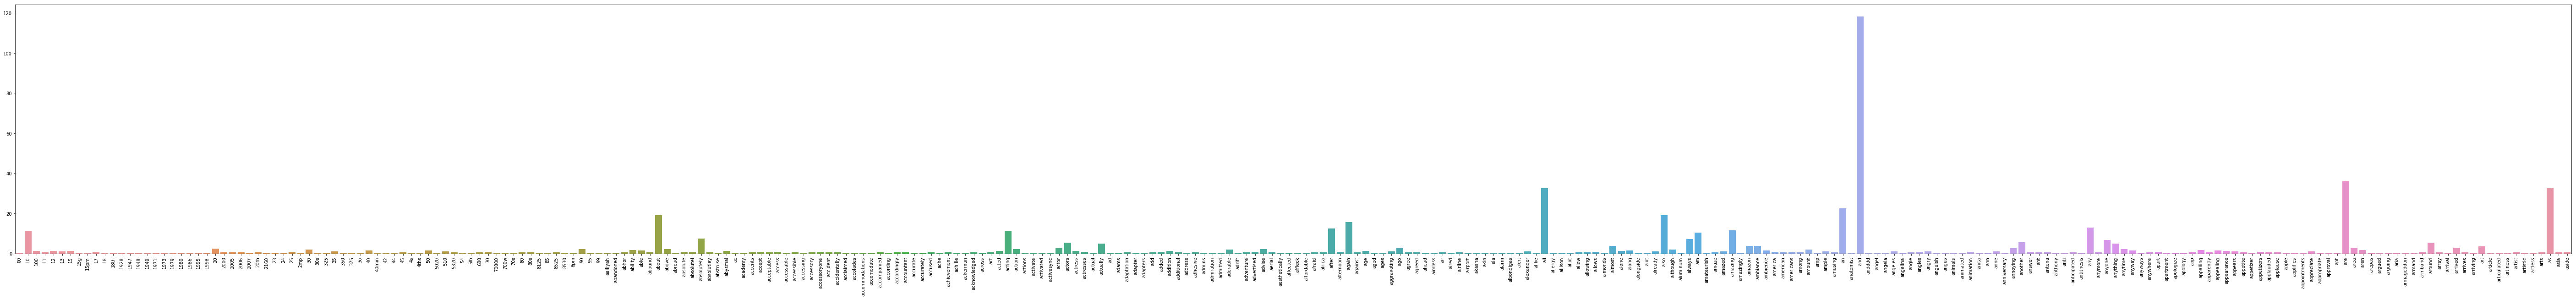

In [52]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=vect.get_feature_names()[:300], 
            y=frequencies[:300])
g.set_xticklabels(vect.get_feature_names()[:300], rotation = 90);

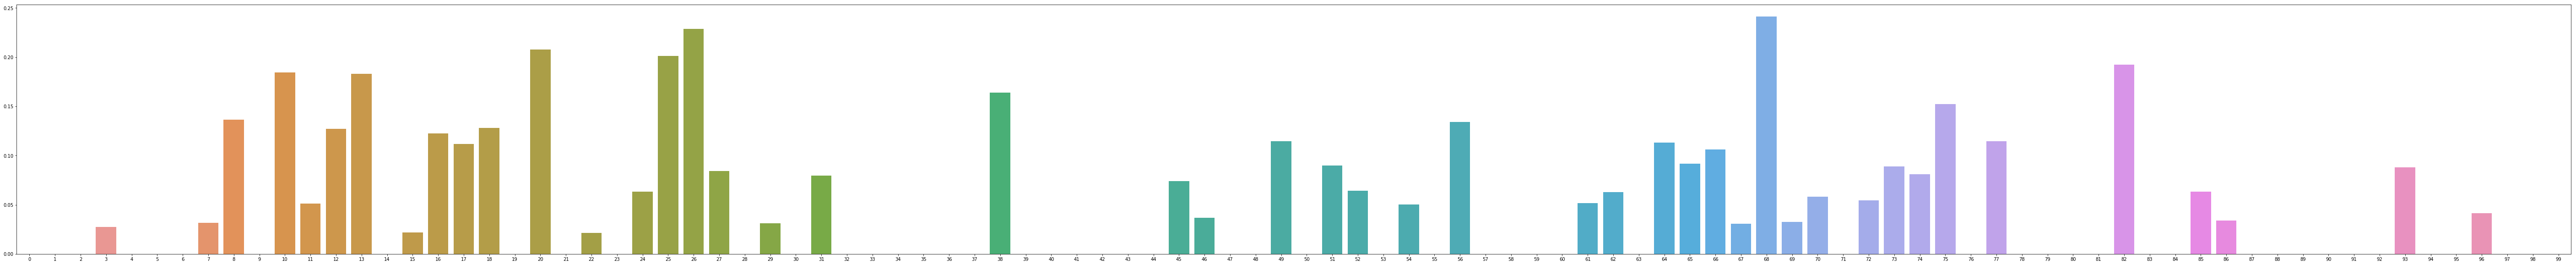

In [53]:
# compute the cosine similarity between random sentences 
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = []
for i in range(100):
    vect_tfidf = TfidfVectorizer()
    X_tfidf = vect_tfidf.fit_transform(X.sample(n=2).text)
    a = X_tfidf[:][:].toarray()
    cos_sim.append(cosine_similarity(a[0:1][:].tolist(),a[1:2][:].tolist()))

X_list, Y_list = [], []
for x in range(100):
    X_list.append(x)
    Y_list.append(cos_sim[x][0][0])

plt.subplots(figsize=(100, 10))
g = sns.barplot(x = X_list[:],y=Y_list[:])

As the figure show , there are som many '0' among one hundred test.
Maybe in the different dataset(im_db,amazon,yelp), the s.milarity between those is quite low.

In [54]:
# implement a Naive Bayes classifier
# spilt data , 30% for test 70% for train
from sklearn.model_selection import train_test_split

train_X, test_X,score_X,ans_X= train_test_split(X_feature, X.score, test_size=0.3)
print (train_X.shape)
print (score_X.shape)

(2074, 5153)
(2074,)


In [55]:
# build model and train_X as input 
# predict test_X
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(train_X.toarray(), pd.to_numeric(score_X,downcast= 'float'))
pred_X = GNB.predict(test_X.toarray())

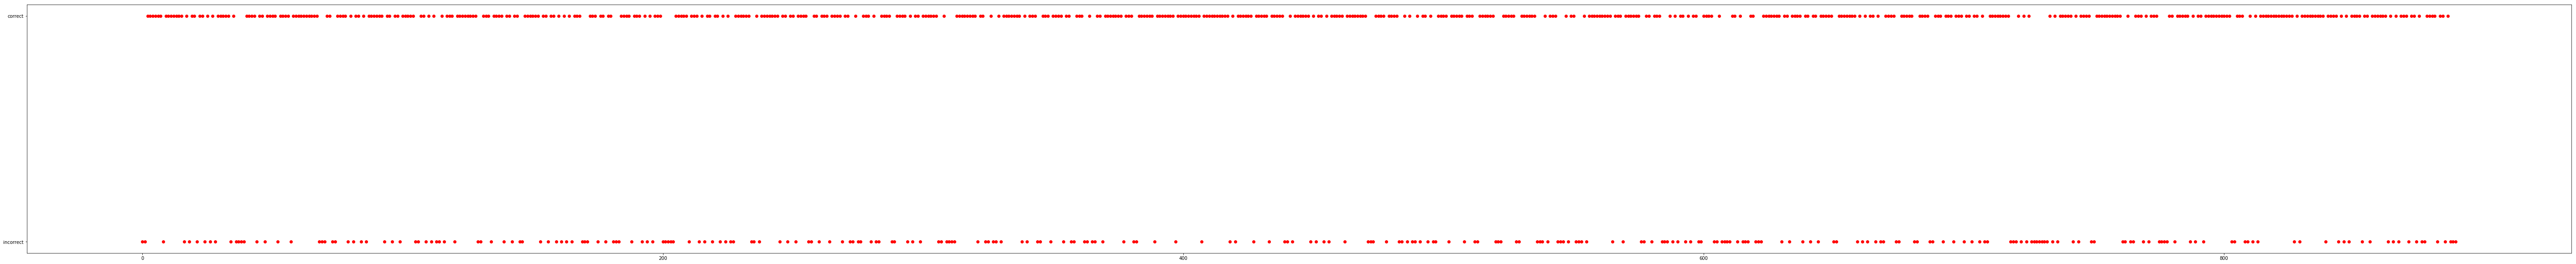

In [56]:
# plot the comparasion of predict score
py, px, i = [], [], 0
for x in ans_X:
    if pred_X[i] == pd.to_numeric(x,downcast= 'float'):
        py.append('correct')
    else:
        py.append('incorrect')
    px.append(i)
    i= i+1
    
plt.subplots(figsize=(100, 10))
plt.plot(px, py, 'o', color='red');

The prediction may have about 60% or 70% accuracy.
It's obvious that the correct classification more than the incorrect one.